# kaggle - Pandas

https://www.kaggle.com/learn/pandas

- [1. Creating, Reading and Writing](#1.-Creating,-Reading-and-Writing)
    - [1.1 Introduction](#1.1-Introduction)
    - [1.2 Getting started](#1.2-Getting-started)
    - [1.3 Creating data](#1.3-Creating-data)
        - [1.3.1 DataFrame](#1.3.1-DataFrame)
        - [1.3.2 Series](#1.3.2-Series)
    - [1.4 Reading data files](#1.4-Reading-data-files)
    - [1.5 Writing data files](#1.5-Writing-data-files)
- [2. Indexing, Selecting & Assigning](#2.-Indexing,-Selecting-&-Assigning)
    - [2.1 Native accessors](#2.1-Native-accessors)
    - [2.2 Indexing in pandas](#2.2-Indexing-in-pandas)
        - [2.2.1 Index-based selection](#2.2.1-Index-based-selection)
        - [2.2.2 Label-based selection](#2.2.2-Label-based-selection)
        - [2.2.3 Choosing between `loc` and `iloc`](#2.2.3-Choosing-between-loc-and-iloc)
    - [2.3 Manipulating the index](#2.3-Manipulating-the-index)
    - [2.4 Conditional selection](#2.4-Conditional-selection)
        - [Views and copies](#Views-and-copies)
    - [2.5 Assigning data](#2.5-Assigning-data)
- [3. Summary Functions and Maps](#3.-Summary-Functions-and-Maps)
    - [3.1 Summary functions](#3.1-Summary-functions)
    - [3.2 Maps](#3.2-Maps)
- [4. Grouping and Sorting](#4.-Grouping-and-Sorting)
    - [4.1 Groupwise analysis](#4.1-Groupwise-analysis)
    - [4.2 Multi-indexes](#4.2-Multi-indexes)
    - [4.3 Sorting](#4.3-Sorting)
- [5. Data Types and Missing Values](#5.-Data-Types-and-Missing-Values)
    - [5.1 Dtypes](#5.1-Dtypes)
    - [5.2 Missing data](#5.2-Missing-data)
- [6. Renaming and Combining](#6.-Renaming-and-Combining)
    - [6.1 Renaming](#6.1-Renaming)
    - [6.2 Combining](#6.2-Combining)

## 1. Creating, Reading and Writing

### 1.1 Introduction
https://pandas.pydata.org/

### 1.2 Getting started

In [1]:
import pandas as pd

### 1.3 Creating data
Two main core objects in pandas: __DataFrame__ and __Series__.

#### 1.3.1 DataFrame
A DataFrame is a table. It contains an array of individual _entries_, each of which has a certain value. Each entry corresponds to a _row_ (or _record_) and a _column_.

In [2]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


In [3]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


The list of row labels used in a DataFrame is known as an **Index**. We can assign values to it by using an `index` parameter in our constructor:

In [4]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


#### 1.3.2 Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign index values to the Series the same way as before, using an `index` parameter. However, a Series does not have a column name, <code style="background:yellow;color:black">it only has one overall `name`</code>:

In [6]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together". 

### 1.4 Reading data files

A CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

We'll use the `pd.read_csv()` function to read the data into a DataFrame. 

```python
wine_reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
wine_reviews.head()
```

```python
wine_reviews.shape
```

### 1.5 Writing data files

Use the `to_csv` function to write a DataFrame to a csv file.
```python
wine_reviews.to_csv('wine_reviews.csv')
```

## 2. Indexing, Selecting & Assigning

### 2.1 Native accessors

Native Python objects provide good ways of indexing data. Pandas carries all of these over, which helps make it easy to start with.
```python
reviews.country
reviews['country']
reviews['country'][0]
```

### 2.2 Indexing in pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `loc` and `iloc`. For more advanced operations, these are the ones you're supposed to be using.

#### 2.2.1 Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data. `iloc` follows this paradigm.

```python
reviews.iloc[0]
```

Both `loc` and `iloc` are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with `iloc`, we can do the following:
```python
reviews.iloc[:, 0]
reviews.iloc[:3, 0]
reviews.iloc[1:3, 0]
reviews.iloc[[0, 1, 2], 0]
reviews.iloc[-5:]
```

#### 2.2.2 Label-based selection

The second paradigm for attribute selection is the one followed by the `loc` operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

For example, to get the first entry in reviews, we would now do the following:
```python
reviews.loc[0, 'country']
```

`iloc` is conceptually simpler than loc because it ignores the dataset's indices. When we use `iloc` we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. `loc`, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using `loc` instead. For example, here's one operation that's much easier using `loc`:
```python
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]
```

#### 2.2.3 Choosing between `loc` and `iloc`

Different indexing schemes:
- `iloc` uses the Python stdlib indexing scheme, the last element of the range is excluded. 
- `loc`,  select "all the alphabetical fruit choices between Apples and Potatoes", then it's a lot more convenient to index `df.loc['Apples':'Potatoes']`. 
- `df.loc[0:1000]` return 1001 entries

Example: Create a variable df containing the country and variety columns of the first 100 records. 
```python
# Method 1:
df = reviews.loc[:99, ['country', 'variety']]

# Method 2:
col_idx = [reviews.columns.get_loc('country'), reviews.columns.get_loc('variety')]
col_idx = [i for i, x in enumerate(reviews.columns) if x in ['country', 'variety']]
df = reviews.iloc[:100, col_idx]
```

### 2.3 Manipulating the index

Use a column as the index
```python
reviews.set_index("title")
```

You can create `df2.index` by `df1.index` by `set_index`, only necessary same length of both DataFrames:
```python
df2.set_index(df1.index)
```

### 2.4 Conditional selection

```python
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]
```

Built-in conditional selectors:
- `isin`
- `isnull`, `notnull`

```python
mask = reviews.country.isin(['Italy', 'France'])
reviews.loc[mask]
reviews.loc[reviews.price.notnull()]
```
Note: `df[mask]` returns a DataFrame with the rows from df for which mask is True. If you try to change DataFrame by extracting rows using `mask`, you’ll get a `SettingWithCopyWarning`, and DataFrame will remain the same:

### Views and copies

Source: https://realpython.com/pandas-settingwithcopywarning/#example-of-a-settingwithcopywarning

```python
df[mask]["z"] = 0
```
>__main__:1: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

>See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

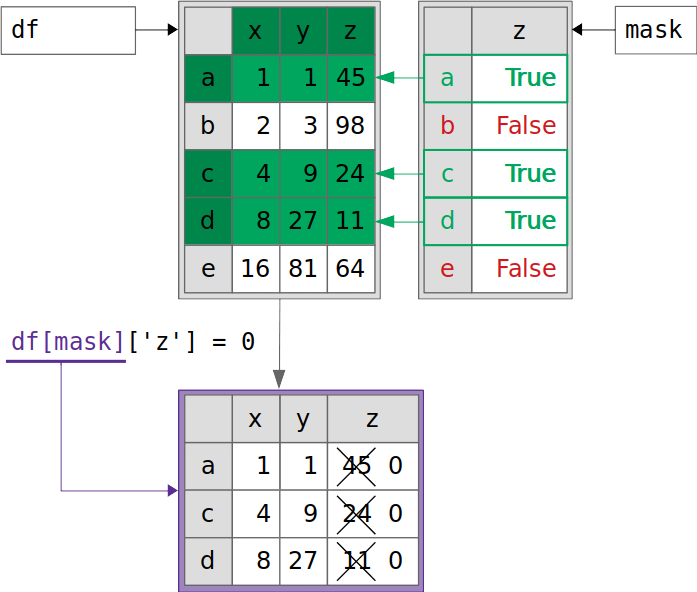

- `df[mask]` returns a completely new DataFrame (outlined in purple). This DataFrame holds a copy of the data from df that correspond to True values from mask (highlighted in green).
- `df[mask]["z"] = 0` modifies the column z of the new DataFrame to zeros, leaving df untouched.

Correct way:
```python
f.loc[mask, "z"] = 0
```
This approach enables you to provide two arguments, `mask` and "z", to the single method that assigns the values to the DataFrame.

An alternative way to fix this issue is to change the evaluation order:
```python
df["z"][mask] = 0
```
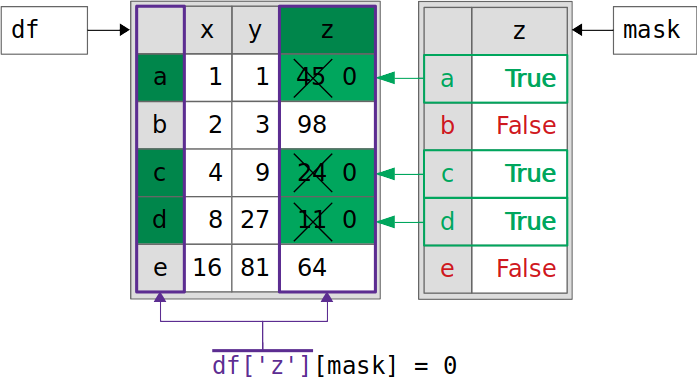
- `df["z"]` returns a Series object (outlined in purple) that points to _the same_ data as the column z in df, not its copy.
- `df["z"][mask] = 0` modifies this Series object by using __chained assignment__ to set the masked values (highlighted in green) to zero.
- `df` is modified as well since the Series object df["z"] holds the same data as df.

Invoking accessors is usually considered better practice than chained assignment for these reasons:
1. The intention to modify df is clearer to Pandas when you use a single method.
2. The code is cleaner for readers.
3. The accessors tend to have better performance, even though you won’t notice this in most cases.

However, using accessors sometimes isn’t enough. They might also return copies, in which case you can get a SettingWithCopyWarning:
```python
df.loc[mask]["z"] = 0
```
>__main__:1: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

>See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In this example, as in the previous one, you use the accessor .loc[]. The assignment fails because df.loc[mask] returns a new DataFrame with a copy of the data from df. Then df.loc[mask]["z"] = 0 modifies the new DataFrame, not df.

Generally, to avoid a SettingWithCopyWarning in Pandas, you should do the following:

    Avoid chained assignments that combine two or more indexing operations like df["z"][mask] = 0 and df.loc[mask]["z"] = 0.
    Apply single assignments with just one indexing operation like df.loc[mask, "z"] = 0. This might (or might not) involve the use of accessors, but they are certainly very useful and are often preferable.


### 2.5 Assigning data

```python
reviews['critic'] = 'everyone'
reviews['index_backwards'] = range(len(reviews), 0, -1)


## 3. Summary Functions and Maps

### 3.1 Summary functions

```python
reviews.points.describe()
reviews.points.mean()
reviews.points.median()
reviews.points.idxmax() # index of the maximum
reviews.taster_name.unique() # return a list of unique values 
reviews.taster_name.value_counts() # return a list of unique values and how often they occur in the dataset 
```

### 3.2 Maps

A __map__ is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values.

1. `map`
```python
review_points_mean = reviews.points.mean()
reviews.points.map(lambda p: p - review_points_mean)
```

2. `apply()` is the equivalent method if we want to transform a whole DataFrame by calling a custom method on each row.
```python
def remean_points(row):
    row.points = row.points - review_points_mean
    return row  
reviews.apply(remean_points, axis='columns')
```

If we had called `reviews.apply()` with `axis='index'`, then instead of passing a function to transform each row, we would need to give a function to transform each column.

Note that `map()` and `apply()` return new, transformed Series and DataFrames, respectively. They don't modify the original data they're called on. If we look at the first row of reviews, we can see that it still has its original `points` value.

Pandas provides many common mapping operations as built-ins.  

For example, here's a faster way of remeaning our points column:
```python
review_points_mean = reviews.points.mean()
reviews.points - review_points_mean
```

Combining country and region information in the dataset would be to do the following:
```python
reviews.country + " - " + reviews.region_1
```

These operators are faster than `map()` or `apply()` because they uses speed ups built into pandas. All of the standard Python operators (`>`, `<`, `==`, and so on) work in this manner.

However, they are not as flexible as `map()` or `apply()`, which can do more advanced things, like applying conditional logic, which cannot be done with addition and subtraction alone.

Exercise: create a Series `descriptor_counts` counting how many times each of two words "tropical" and "fruity" appears in the `description` column in the dataset.
```python
n_tropical = reviews.description.map(lambda x: 'tropical' in x).sum()
n_fruity = reviews.description.map(lambda x: 'fruity' in x).sum()
descriptor_counts = pd.Series([n_tropical, n_fruity], index=['tropical', 'fruity'])
```

Exercise: create a series star_ratings with the number of stars corresponding to each review in the dataset.
```python
def starRating(row):
    star = 1
    if row.points >= 95:
        star = 3
    elif row.points >= 85:
        star = 2
        
    if row.country == 'Canada':
        star = 3
        
    return star
        
star_ratings = reviews.apply(starRating, axis='columns')
```

## 4. Grouping and Sorting

### 4.1 Groupwise analysis

We can replicate what `value_counts()` does by doing the following:
```python
reviews.groupby('points').points.count()
```

Get the cheapest wine in each point value category
```python
reviews.groupby('points').price.min()
```

You can think of each group we generate as being a slice of our DataFrame containing only data with values that match. This DataFrame is accessible to us directly using the `apply()` method, and we can then manipulate the data in any way we see fit. For example, here's one way of selecting the name of the first wine reviewed from each winery in the dataset:
```python
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])
```

For even more fine-grained control, you can also group by more than one column. For an example, here's how we would pick out the best wine by country and province:
```python
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])
```

Another `groupby()` method worth mentioning is `agg()`, which lets you run a bunch of different functions on your DataFrame simultaneously. For example, we can generate a simple statistical summary of the dataset as follows:
```python
reviews.groupby(['country']).price.agg([len, min, max])
```

### 4.2 Multi-indexes

A multi-index differs from a regular index in that it has multiple levels. For example:
```python
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
mi = countries_reviewed.index
type(mi)
```
<p style="background:black">
<code style="background:black;color:white">pandas.core.indexes.multi.MultiIndex
</code>
</p>



Multi-indices have several methods for dealing with their tiered structure which are absent for single-level indices. They also require two levels of labels to retrieve a value. Dealing with multi-index output is a common "gotcha" for users new to pandas.

The use cases for a multi-index are detailed alongside instructions on using them in the [MultiIndex / Advanced Selection](https://pandas.pydata.org/pandas-docs/stable/advanced.html "https://pandas.pydata.org/pandas-docs/stable/advanced.html") section of the pandas documentation.

However, in general the multi-index method you will use most often is the one for converting back to a regular index, the `reset_index()` method:
```python
countries_reviewed.reset_index()
```

### 4.3 Sorting

When outputting the result of a groupby, the order of the rows is dependent on the values in the index, not in the data. To get data in the order of the data, use `sort_values`:
```python
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len', ascending=False) # default: ascending=True
```

To sort by index values, use `sort_index()`
```python
countries_reviewed.sort_index()
```

Finally, know that you can sort by more than one column at a time:
```python
countries_reviewed.sort_values(by=['country', 'len'])
```

Exercise  
1. Who are the most common wine reviewers in the dataset? Create a `Series` whose index is the `taster_twitter_handle` category from the dataset, and whose values count how many reviews each person wrote.
```python
reviews.groupby('taster_twitter_handle').size()
reviews_written = reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()
```

2. What is the best wine I can buy for a given amount of money? Create a `Series` whose index is wine prices and whose values is the maximum number of points a wine costing that much was given in a review. Sort the values by price in ascending.
```python
best_rating_per_price = reviews.groupby('price').points.max().sort_index()
```

3. What are the minimum and maximum prices for each `variety` of wine? Create a DataFrame whose index is the `variety` category from the dataset and whose values are the `min` and `max` values thereof.
```python
price_extremes = reviews.groupby('variety').price.agg([min, max])
```

4. What are the most expensive wine varieties? Create a variable `sorted_varieties` containing a copy of the dataframe from the previous question where varieties are sorted in descending order based on minimum price, then on maximum price (to break ties).
```python
sorted_varieties = price_extremes.sort_values(by=['min', 'max'], ascending=False)
```

5. Create a Series whose index is reviewers and whose values is the average review score given out by that reviewer. Hint: you will need the `taster_name` and `points` columns.
```python
reviewer_mean_ratings = reviews.groupby('taster_name').points.mean()
```

6. What combination of countries and varieties are most common? Create a Series whose index is a `MultiIndexof {country, variety}` pairs. For example, a pinot noir produced in the US should map to `{"US", "Pinot Noir"}`. Sort the values in the Series in descending order based on wine count.
```python
country_variety_counts = reviews.groupby(['country', 'variety']).size().sort_values(ascending=False)
```

## 5. Data Types and Missing Values

### 5.1 Dtypes

The data type for a column in a DataFrame or a Series is __dtype__.

You can use the `dtype` property to grab the type of a specific column.
```python
reviews.price.dtype
```
<p style="background:black">
<code style="background:black;color:white">dtype('float64')
</code>
</p>

Alternatively, the `dtypes` property returns the `dtype` of every column in the DataFrame:
```python
reviews.dtypes
```

One peculiarity to keep in mind is that columns consisting entirely of strings do not get their own type; they are instead given the `object` type.

Convert a column of one type into another wherever such a conversion makes sense by using the `astype()` function. 
```python
reviews.points.astype('float64') # convert from int64
```

A DataFrame or Series index has its own dtype, too:
```python
reviews.index.dtype
```
<p style="background:black">
<code style="background:black;color:white">dtype('int64')
</code>
</p>

### 5.2 Missing data

Entries missing values are given the value `NaN`, short for "Not a Number". For technical reasons these `NaN` values are always of the `float64` dtype.

Pandas provides some methods specific to missing data. To select NaN entries you can use `pd.isnull()` (or its companion `pd.notnull()`).
```python
reviews[pd.isnull(reviews.country)]
```

`fillna()` provides a few different strategies for replacing missing values:
- value = scalar, dict, Series, or DataFrame
- method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None

```python
reviews.region_2.fillna("Unknown")
```

Replace a non-null value with `replace()` method
```python
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")
```

## 6. Renaming and Combining

### 6.1 Renaming

The first function we'll introduce here is `rename()`, which lets you change index names and/or column names.
```python
reviews.rename(columns={'points': 'score'})
```

`rename()` lets you rename index or column values by specifying a `index` or `column` keyword parameter, respectively. It supports a variety of input formats, but usually a Python dictionary is the most convenient.
```python
reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})
```

You'll probably rename columns very often, but rename index values very rarely. For that, `set_index()` is usually more convenient.

`rename_axis()` - set the name of the axis for the index or columns 
- axis{0 or ‘index’, 1 or ‘columns’}, default 0

```python
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

```

### 6.2 Combining

- `concat()`
- `join()`
- `merge()`

Most of what `merge()` can do can also be done more simply with `join()`.

The simplest combining method is `concat()`. Given a list of elements, this function will smush those elements together along an axis. This is useful when we have data in different DataFrame or Series objects but having the same fields (columns).
- objs: a sequence or mapping of Series or DataFrame objects
- axis: {0/’index’, 1/’columns’}, default 0
- join: {‘inner’, ‘outer’}, default ‘outer’

`join()` lets you combine different DataFrame objects which have an index in common.
- other: DataFrame, Series, or list of DataFrame
- on: str, list of str, or array-like, optional
- how: {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’
- lsuffix: str, default ‘’
- rsuffix: str, default ‘’

```python
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')
```